# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1l7bHyrjzq839zVZE06cfdDksLabCN2hg"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Future Sales Time-series Prediction 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1vi45x-LGEzwvJoQstierOC1QZ11QQUmS)

![alt text](https://drive.google.com/uc?id=1eLLebiXwkN6x1dpsopQmkVNkR9zAYL7H)

![alt text](https://drive.google.com/uc?id=1a_q_DC8NyGBmcrxE0sGV4r6Hl-0w6G0K)

![alt text](https://drive.google.com/uc?id=1hNE0Wwc_bCCIO-AUAi6Xqo_9Bf1Xbh2o)

![alt text](https://drive.google.com/uc?id=1lQVgHsXn4Ur61dgYul1G-CmseLLUCEOB)

# TASK #2: IMPORT LIBRARIES AND DATASET 

In [2]:
!pip install fbprophet

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from fbprophet import Prophet

TASK #2.1: IMPORT SALES TRAINING DATA

In [6]:
# You have to include the full link to the csv file containing your dataset
df_train = pd.read_csv('../input/rossmann-store-sales/train.csv')
df_train.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


#### almost a million observation 
#### 1115 unique stores 
#### Note that sales is the target variable (that's what we are trying to predict) 

#### Id: transaction ID (combination of Store and date) 
#### Store: unique store Id
#### Sales: sales/day, this is the target variable 
#### Customers: number of customers on a given day
#### Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
#### Promo: describes if store is running a promo on that day or not
#### StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
#### SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
#### Data Source: https://www.kaggle.com/c/rossmann-store-sales/data



In [7]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


#### 9 columns in total 
#### 8 features, each contains 1017209 data points
#### 1 target variable (sales)
#### Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551 
#### Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388###

TASK #2.2: IMPORT STORE INFORMATION DATA

In [8]:
df_store = pd.read_csv('../input/rossmann-store-sales/store.csv')
df_store.head()
# StoreType: categorical variable to indicate type of store (a, b, c, d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2Since [Year/Week]: date when the store started participating in Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
df_store.info()
df_store.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


#### Let's do the same for the store_info_df data
#### Note that the previous dataframe includes the transactions recorded per day (in millions)
#### This dataframe only includes information about the unique 1115 stores that are part of this study 
#### on average, the competition distance is 5404 meters away (5.4 kms)

# TASK #3: EXPLORE DATASET

TASK #3.1: EXPLORE SALES TRAINING DATA

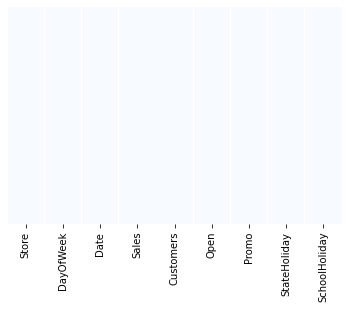

In [10]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='Blues',cbar=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f22e152d0>,
      dtype=object)

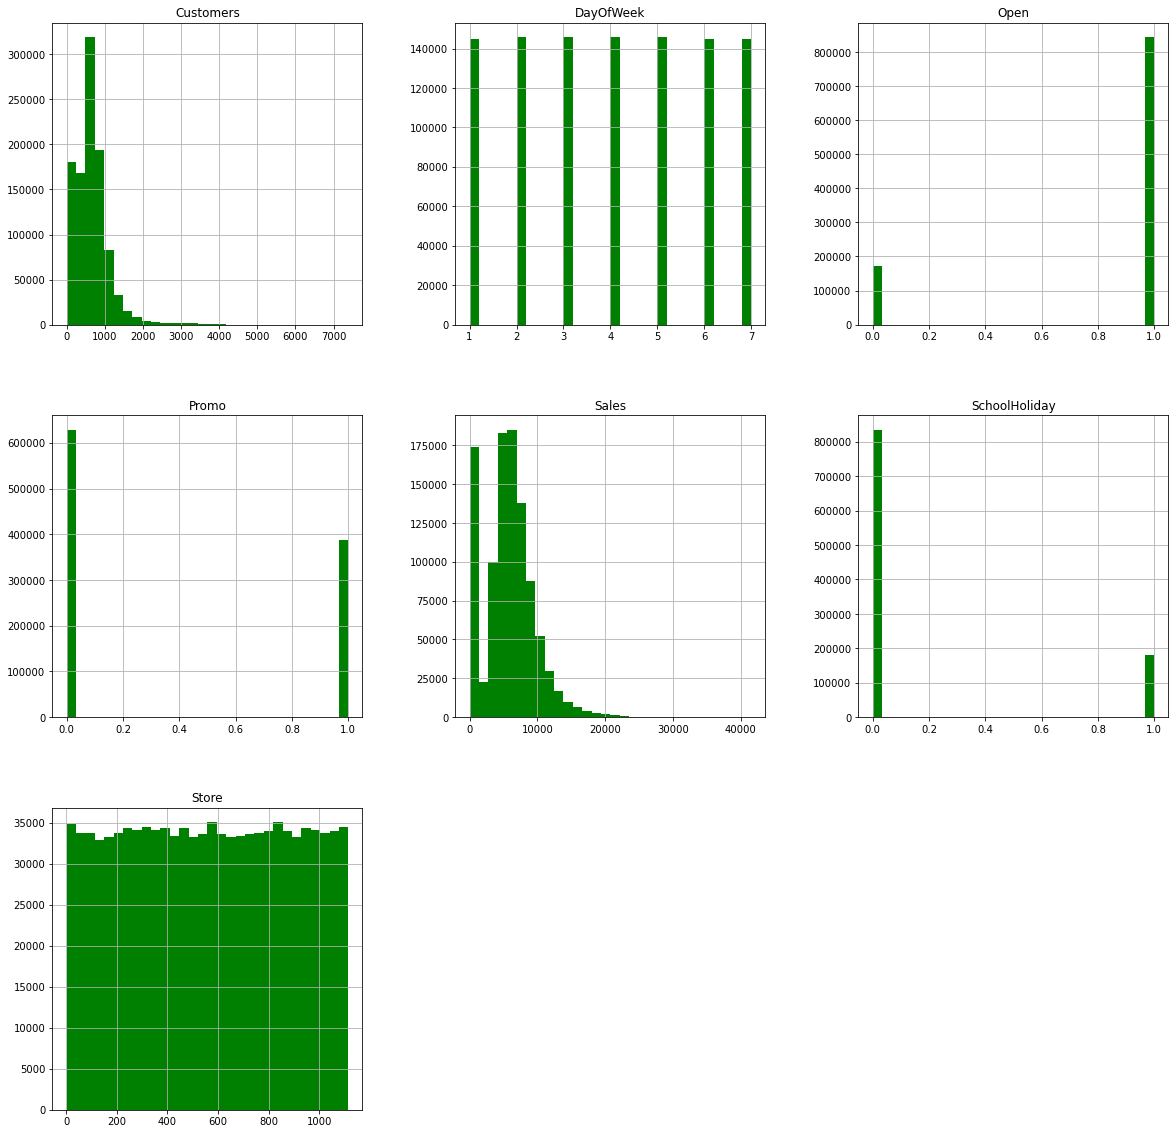

In [11]:
df_train.hist(bins=30,color='g',figsize = (20,20))

#### Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
#### Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
#### Stores are open ~80% of the time
#### Data is equally distributed among all stores (no bias)
#### Promo #1 was running ~40% of the time 
#### Average sales around 5000-6000 Euros
#### School holidays are around ~18% of the time###

In [12]:
# Let's see how many stores are open and closed! 
df_train['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [13]:
# Count the number of stores that are open and closed
print('Total number of stores: {}'.format(len(df_train)))
print('Total number of open stores: 844392')
print('Total number of closed stores: 172817')

Total number of stores: 1017209
Total number of open stores: 844392
Total number of closed stores: 172817


In [14]:
# only keep open stores and remove closed stores
df_train = df_train[df_train['Open']==1]

In [15]:
# Let's drop the open column since it has no meaning now
df_train.drop('Open',axis=1,inplace=True)

In [16]:
df_train.shape

(844392, 8)

In [17]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


In [18]:
# Average sales = 6955 Euros,	average number of customers = 762	(went up)

TASK #3.2: EXPLORE STORES INFORMATION DATA

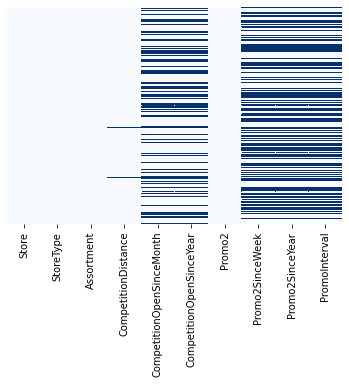

In [19]:
# Let's see if we have any missing data in the store information dataframe!
sns.heatmap(df_store.isnull(),cbar=False,cmap='Blues',yticklabels=False)

In [20]:
# Let's take a look at the missing values in the 'CompetitionDistance'
# Only 3 rows are missing 
df_store['CompetitionDistance'].isnull().sum()

3

In [21]:
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].mean(),inplace=True)

In [22]:
# Let's take a look at the missing values in the 'CompetitionOpenSinceMonth'
# many rows are missing = 354 (almost one third of the 1115 stores)
df_store['CompetitionOpenSinceMonth'].isnull().sum()

354

In [23]:
# It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
# There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing
# Let's set these values to zeros 
df_store.fillna(0,inplace=True)

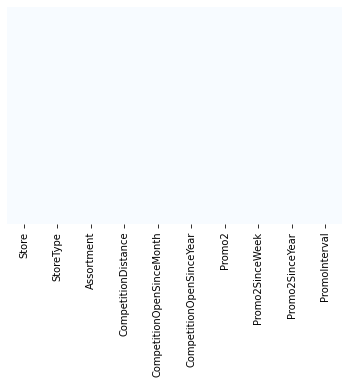

In [24]:
sns.heatmap(df_store.isnull(),cbar=False,cmap='Blues',yticklabels=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f226d6510>,
      dtype=object)

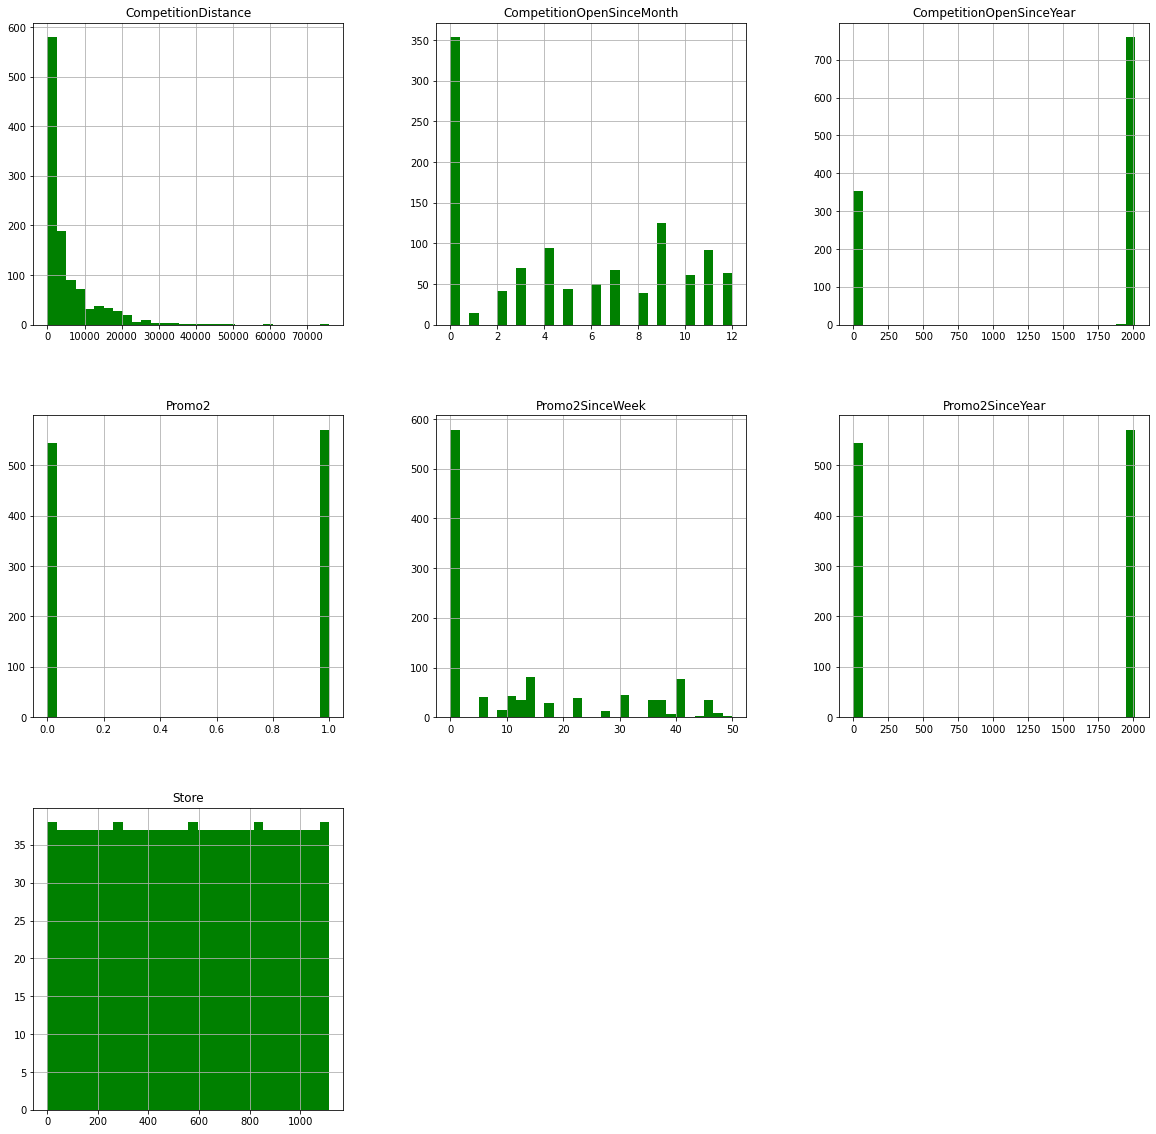

In [25]:
# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)
df_store.hist(figsize=(20,20),color='g',bins=30)

TASK #3.3: EXPLORE MERGED DATASET 

In [26]:
# Let's merge both data frames together based on 'store'
merged_df = pd.merge(df_train,df_store,how='inner',on='Store')

In [27]:
merged_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
426217,564,5,2014-10-17,4901,485,0,0,1,d,c,6540.0,0.0,0.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct"
344549,456,2,2014-01-14,4418,775,0,0,0,a,c,140.0,0.0,0.0,0,0.0,0.0,0
401397,531,3,2014-06-18,4758,604,1,0,0,a,c,4030.0,0.0,0.0,0,0.0,0.0,0
172139,230,6,2015-02-07,7678,956,0,0,0,d,c,6680.0,9.0,2013.0,0,0.0,0.0,0
562899,746,2,2014-12-16,11436,748,1,0,0,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec"


In [28]:
correlations = merged_df.corr()['Sales'].sort_values(ascending=False)
correlations
# customers and promo are positively correlated with the sales 
# Promo2 does not seem to be effective at all 

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
SchoolHoliday                0.038617
Store                        0.007710
CompetitionOpenSinceYear     0.005266
CompetitionOpenSinceMonth   -0.018370
CompetitionDistance         -0.036343
Promo2SinceWeek             -0.058476
Promo2                      -0.127596
Promo2SinceYear             -0.127621
DayOfWeek                   -0.178736
Name: Sales, dtype: float64

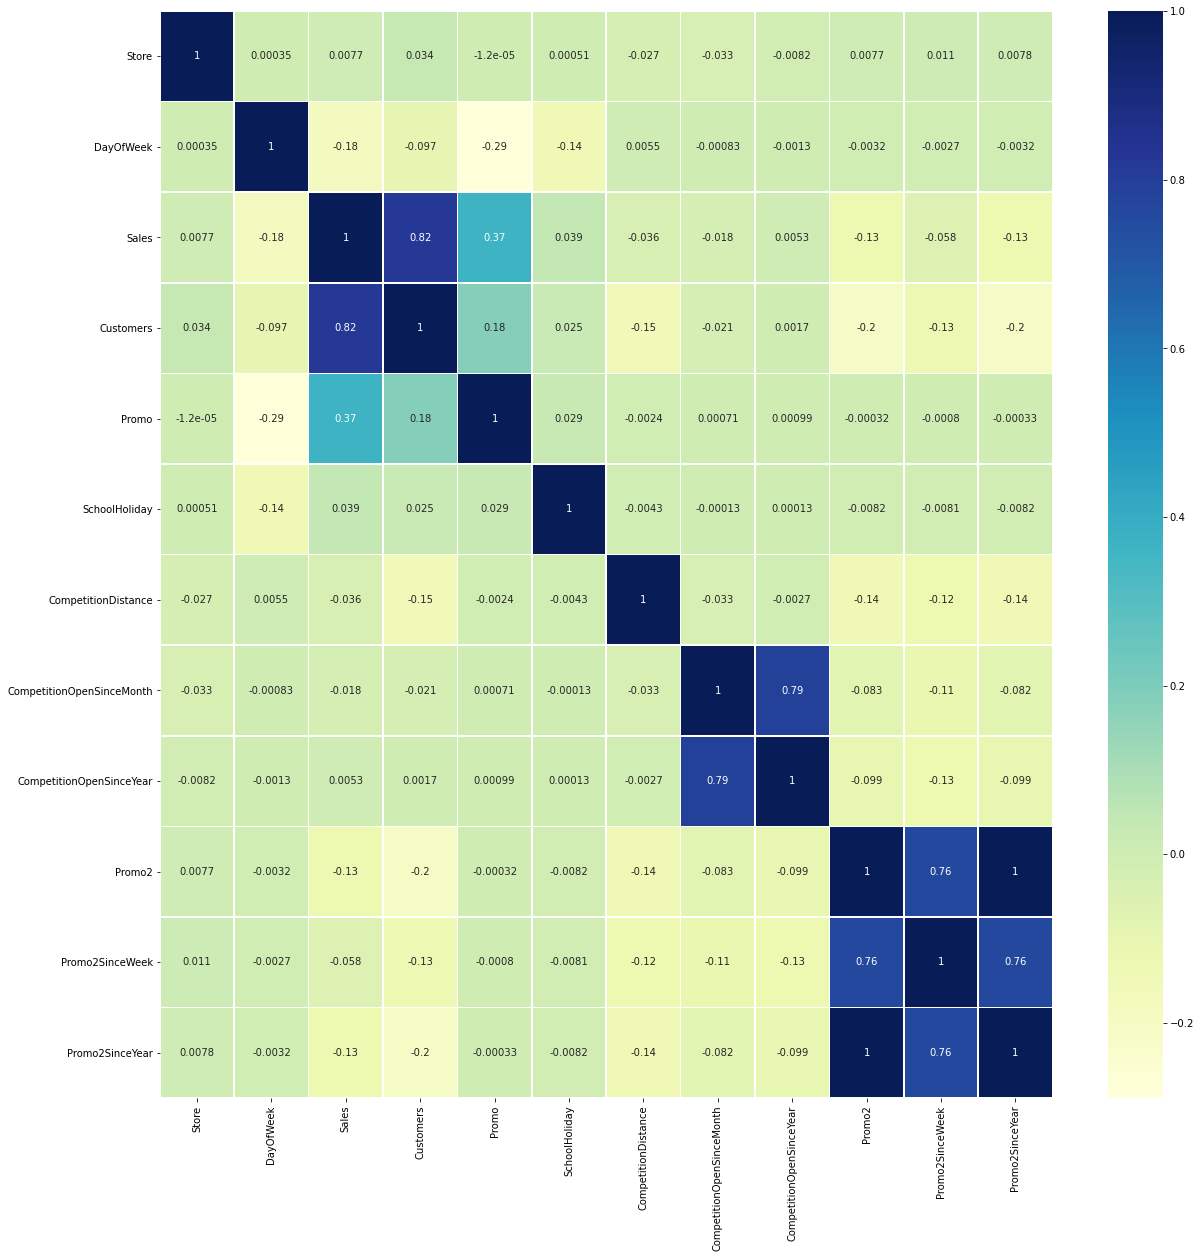

In [29]:
correlations = merged_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations,annot=True,cmap="YlGnBu",linewidths=.5)
# Customers/Prmo2 and sales are strongly correlated 

In [30]:
# Let's separate the year and put it into a separate column 
merged_df['Year'] = pd.DatetimeIndex(merged_df['Date']).year
merged_df['Month'] = pd.DatetimeIndex(merged_df['Date']).month
merged_df['Day'] = pd.DatetimeIndex(merged_df['Date']).day

In [31]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


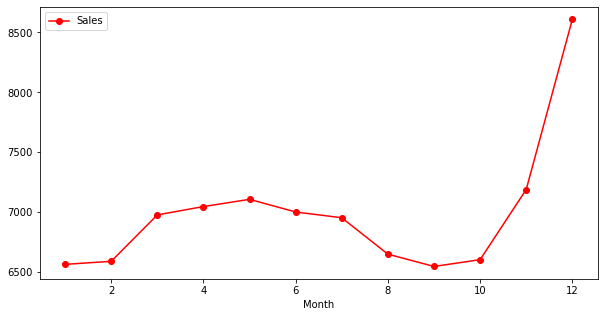

<Figure size 432x288 with 0 Axes>

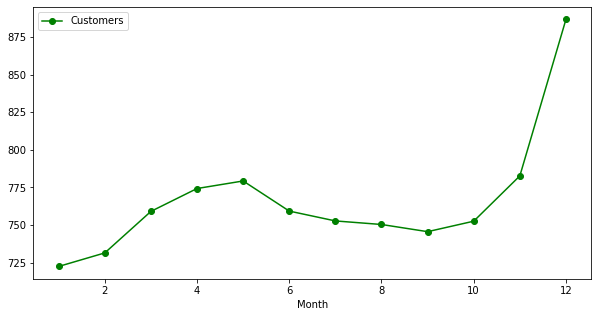

In [32]:
# Let's take a look at the average sales and number of customers per month 
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
# It looks like sales and number of customers peak around christmas timeframe
axis = merged_df.groupby('Month')[['Sales']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.figure()
axis = merged_df.groupby('Month')[['Customers']].mean().plot(figsize=(10,5),marker='o',color='g')


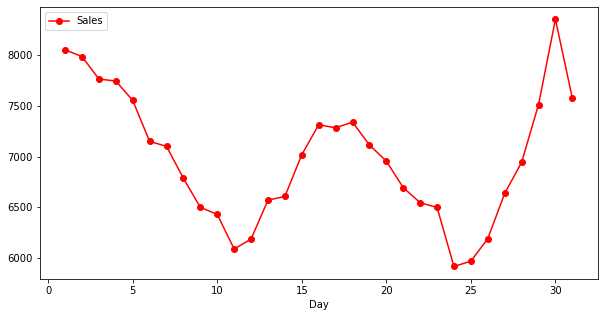

<Figure size 432x288 with 0 Axes>

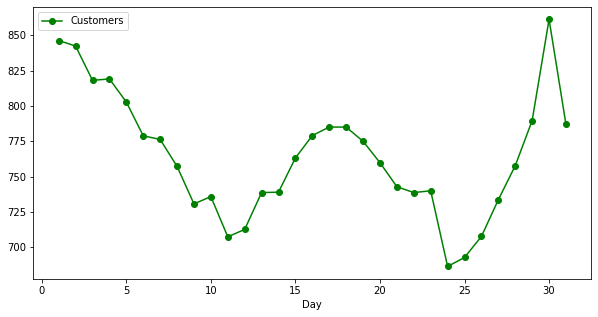

In [33]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month
axis = merged_df.groupby('Day')[['Sales']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.figure()
axis = merged_df.groupby('Day')[['Customers']].mean().plot(figsize=(10,5),marker='o',color='g')


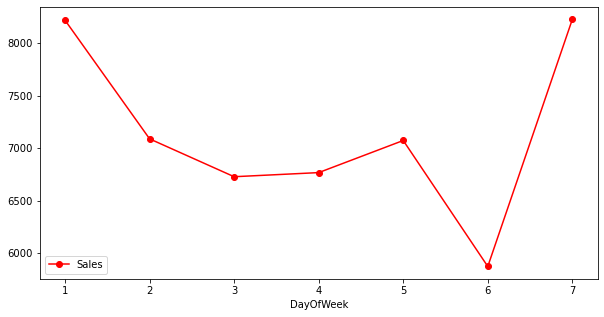

<Figure size 432x288 with 0 Axes>

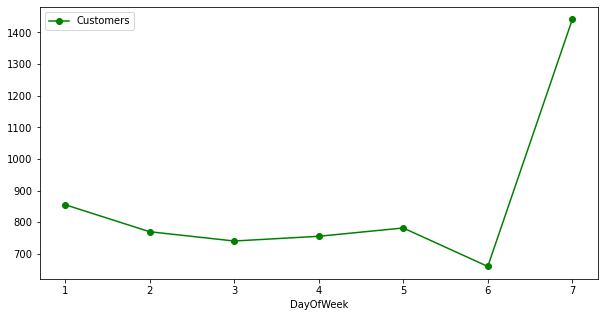

In [34]:
# Let's do the same for the day of the week  (note that 7 = Sunday)
axis = merged_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.figure()
axis = merged_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5),marker='o',color='g')


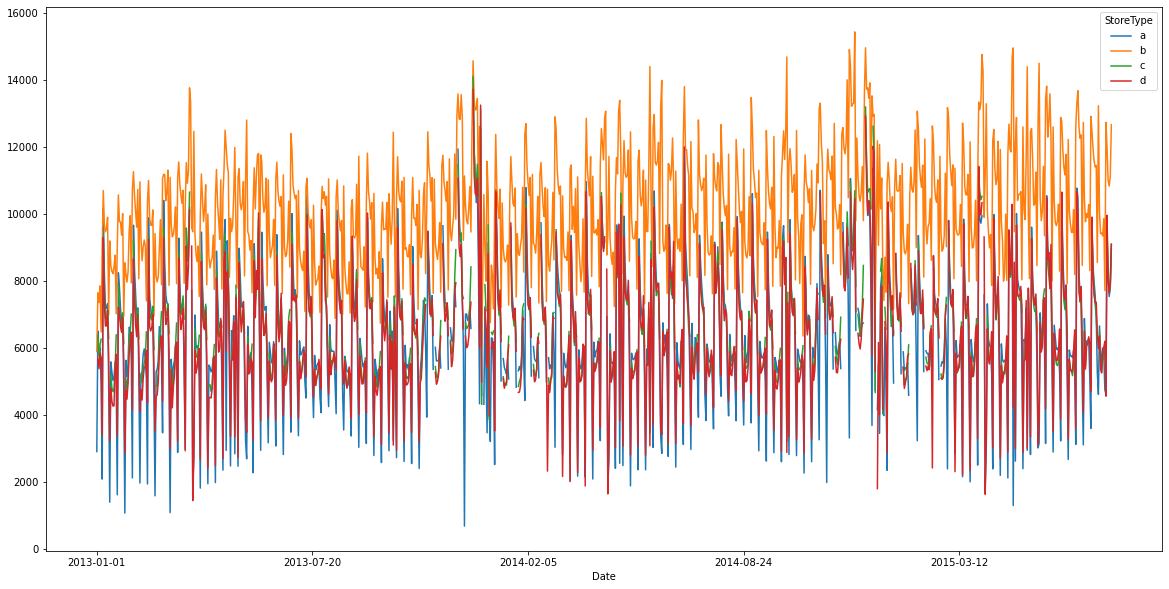

In [35]:
fig,ax = plt.subplots(figsize=(20,10))
merged_df.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)

#### As seen that the store type b has the best sales and type a has the least

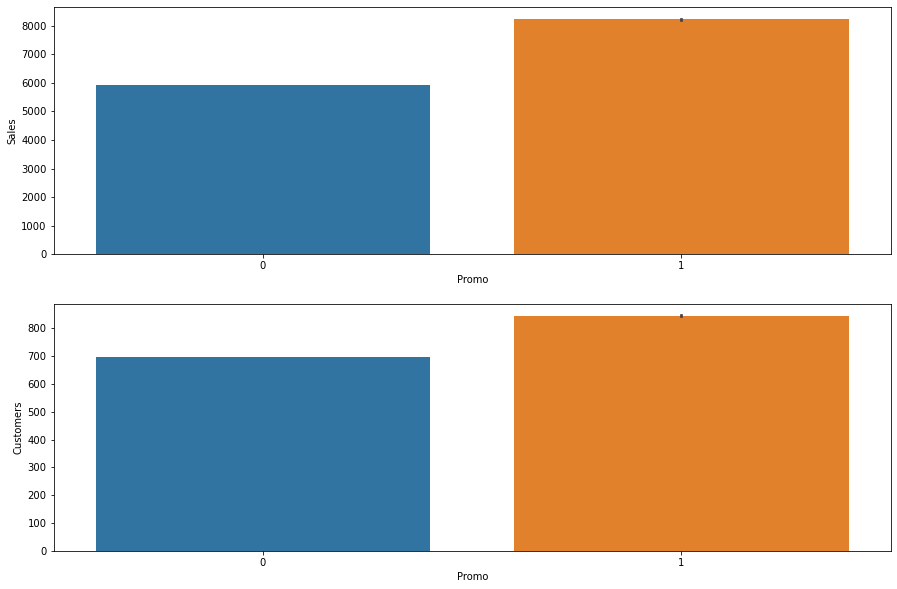

In [36]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.barplot(x="Promo",y='Sales',data=merged_df)
plt.subplot(212)
sns.barplot(x="Promo",y='Customers',data=merged_df)


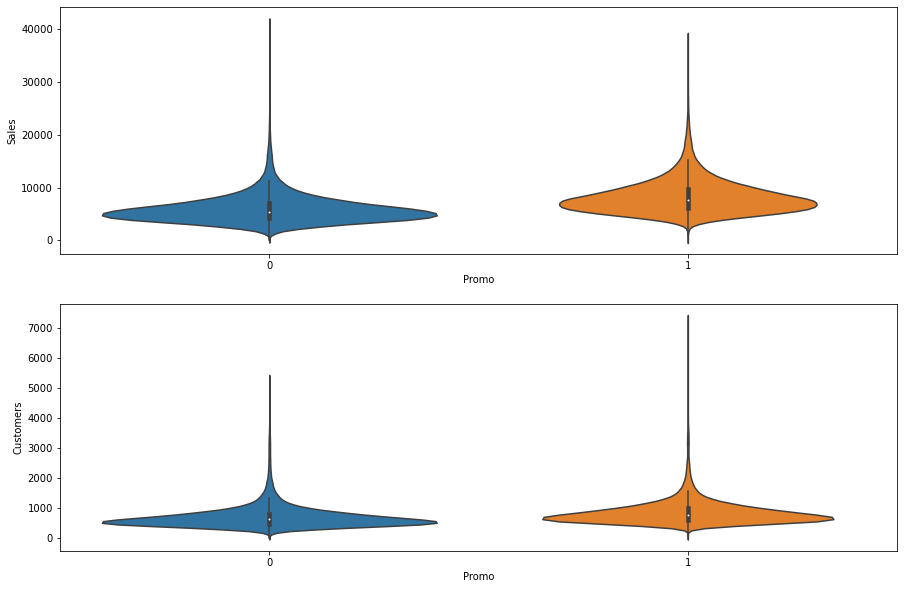

In [37]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.violinplot(x="Promo",y='Sales',data=merged_df)
plt.subplot(212)
sns.violinplot(x="Promo",y='Customers',data=merged_df)

# TASK #4: UNDERSTAND THE INTUITION BEHIND FACEBOOK PROPHET

![alt text](https://drive.google.com/uc?id=1I4lBgLaqERF_-lpGYLuht02wJmwcLGG-)

![alt text](https://drive.google.com/uc?id=1CZ24f-TbnRzaXV9Arke0fNTUm7Kon1gK)

![alt text](https://drive.google.com/uc?id=16gaoTeeuU5PxNZRHt8n2XyFJ52ft1xb7)

# TASK #5: TRAIN THE MODEL PART A

In [39]:
def sales_prediction(Store_ID, sales_df, periods):
  # Function that takes in the data frame, storeID, and number of future period forecast
  # The function then generates date/sales columns in Prophet format
  # The function then makes time series predictions

  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')
  
  model    = Prophet()
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)

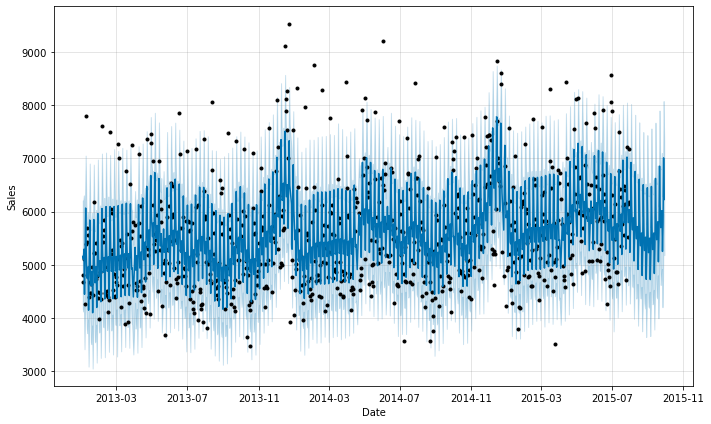

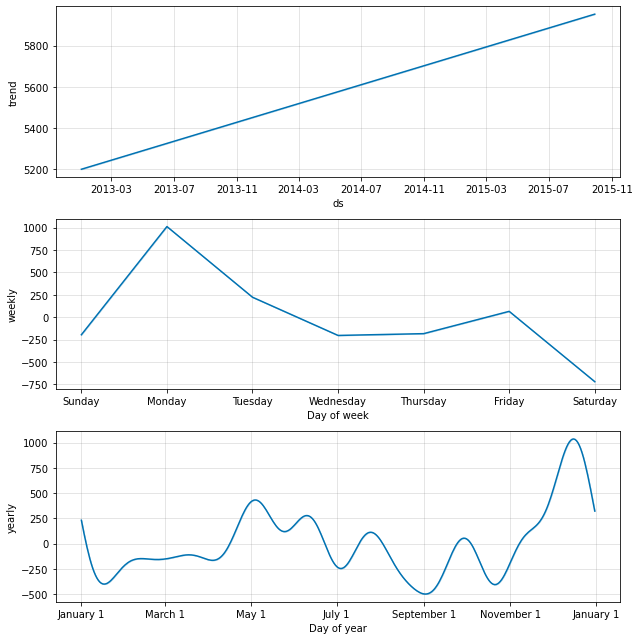

In [42]:
sales_prediction(10, merged_df, 60)

**Now I will consider holidays too in order to make predictions more real**

# TASK #6: TRAIN THE MODEL PART B


   - StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   - SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
  






In [43]:
def sales_prediction_better(Store_ID, sales_df, holidays, periods):
  # Function that takes in the storeID and returns two date/sales columns in Prophet format
  # Format data to fit prophet 

  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')
  
  model    = Prophet(holidays = holidays)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)

In [45]:
# Get all the dates pertaining to school holidays 
school_holidays = merged_df[merged_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [46]:
# Get all the dates pertaining to state holidays 
state_holidays = merged_df[ (merged_df['StateHoliday'] == 'a') | (merged_df['StateHoliday'] == 'b') | (merged_df['StateHoliday'] == 'c')  ].loc[:, 'Date'].values
state_holidays.shape

(910,)

In [47]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})

In [48]:
# concatenate both school and state holidays 
school_state_holidays = pd.concat((state_holidays, school_holidays))

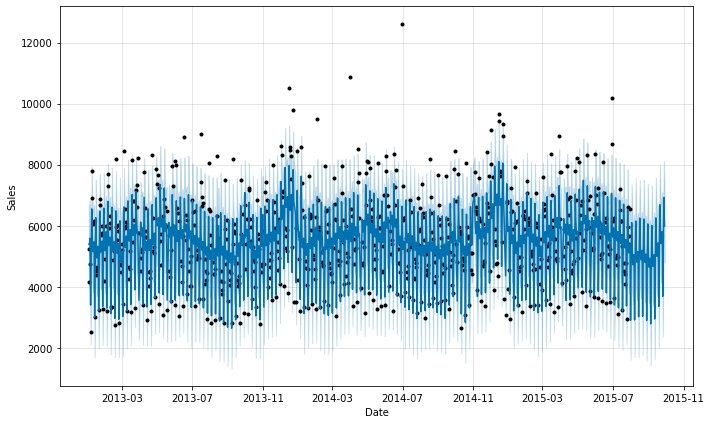

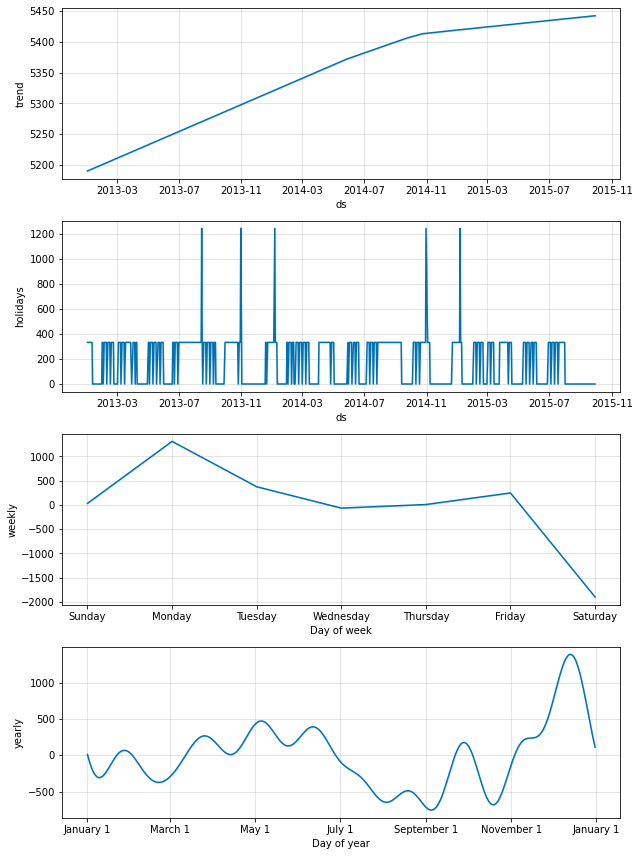

In [51]:
# Let's make predictions using holidays for a specific store
sales_prediction_better(14, merged_df, school_state_holidays, 60)

**The results of predictions are good. Using Facebook prophet is simple, that what I like about it. But I wouold still like to solve this problem statement using ARIMA & LSTM. Then would like to compare results.**